In [1]:
# CREDITS
#https://www.youtube.com/watch?v=7azmUg6XZA0 Open Source Student vaderSentiment and pandas video
#https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS Corey Schafer pandas playlist videos
#https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import pandas as pd

In [2]:
#with open('results/khanacademy/_b-2rZpX5z4.json', 'r') as f:
    #df = json.load(f)

#COMPARE BETWEEN 2 VIDEOS TO START OFF THE SENTIMENT ANALYSIS MODEL  
df1 = pd.read_json('results/crashcourse/_O2sg-PGhEg.json')

df2 = pd.read_json('results/crashcourse/_tULRch1PRQ.json')

#AUTOMATE
#for video_id in video_ids_crashcourse.json:
#   df = pd.read_json(f'results/crashcourse/{video_id}.json')
#   if some json files with those video_ids do not exist, continue to the next (eg. 492 files in crashcourse folder instead of 1,439 videos on crashcourse youtube channel)

In [5]:
df1.head()

,comment_by,comment_text,comment_date,likes_count
0,sam JD,awesome host.. thank u so much,2022-07-14T09:38:00Z,1
1,Franzi Z,I love this series more with every episode I w...,2020-06-18T17:26:03Z,4
2,Wade Allen,When I see images or renderings of super clust...,2020-06-17T17:46:52Z,0
3,Susurrus,It&#39;s kinda like a video game where you try...,2020-06-10T12:41:45Z,1
4,Eugene Scott,Can someone shed some light on why a super mas...,2020-06-06T00:10:48Z,0


In [7]:
df2.head()

,comment_by,comment_text,comment_date,likes_count
0,Rich Invents,"Excellent video, very informative. ONE sugges...",2022-08-15T14:58:30Z,0
1,F Wily,"Talk faster, you are too slow. I only have a 3...",2020-05-16T14:55:28Z,4
2,Sedat Ayyıldız,I like your academic and scientific jokes :)),2020-05-06T10:26:24Z,1
3,Eva Lynn,This mans hilarious,2020-04-28T09:52:08Z,0
4,Timothy Little,The best way to rob a bank is to own one,2020-04-09T07:37:44Z,1


In [3]:
# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

analyzer = SentimentIntensityAnalyzer()
positive1 = []
negative1 = []
neutral1 = []
compound1 = []
sentiment1 = []

positive2 = []
negative2 = []
neutral2 = []
compound2 = []
sentiment2 = []

In [4]:
#for line in df['Comment']:
for line in range(df1.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

    comments = df1.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
    comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))
    
    if comments_analyzed["compound"] >= 0.05:
        sentiment = 'positive'
    elif comments_analyzed["compound"] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    #if comments_analyzed["compound"] >= 0:
        #sentiment = 'positive'
    #else:
        #sentiment = 'negative'

#RUN ONCE
    negative1.append(comments_analyzed["neg"])
    #negative += comments_analyzed["neg"] is not suitable for this

    positive1.append(comments_analyzed["pos"])
    #print(positive)

    neutral1.append(comments_analyzed["neu"])
    #print(neutral)

    compound1.append(comments_analyzed["compound"])
    #print(compound)

    sentiment1.append(sentiment)

     

In [5]:
#for line in df['Comment']:
for line in range(df2.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

    comments = df2.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
    comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))
    
    if comments_analyzed["compound"] >= 0.05:
        sentiment = 'positive'
    elif comments_analyzed["compound"] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    #if comments_analyzed["compound"] >= 0:
        #sentiment = 'positive'
    #else:
        #sentiment = 'negative'


#RUN ONCE
    negative2.append(comments_analyzed["neg"])
    #negative += comments_analyzed["neg"] is not suitable for this

    positive2.append(comments_analyzed["pos"])
    #print(positive)

    neutral2.append(comments_analyzed["neu"])
    #print(neutral)

    compound2.append(comments_analyzed["compound"])
    #print(compound)

    sentiment2.append(sentiment)

cross checking

In [6]:
df1.shape

(1375, 4)

In [7]:
len(negative1)

1375

In [8]:
df2.shape

(222, 4)

In [9]:
len(negative2)

222

In [20]:
#compare visualization graph of averages of 1 video to commentaire's graph of same video
#total of neg / total rows = avg of neg
#neutral + positive = positive

#word cloud 
#combine words from all positive comments from all videos of channel list

In [10]:
df1.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count'], dtype='object')

In [11]:
df2.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count'], dtype='object')

In [12]:
#add new columns to df1


#add new columns and their values to dataframe version of json
df1["negative"] = negative1 #create and add new column named Negative
df1["neutral"] = neutral1
df1["positive"] = positive1
df1["compound"] = compound1
df1["sentiment"] = sentiment1

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of 1st video comments
neg_avg1 = df1['negative'].mean()
print(neg_avg1)

neu_avg1 = df1['neutral'].mean()
print(neu_avg1)

pos_avg1 = df1['positive'].mean()
print(pos_avg1)

compound_avg1 = df1['compound'].mean()
print(compound_avg1)


0.038584
0.8247447272727272
0.13666109090909093
0.18707592727272726


In [13]:
#add new columns to df2


#add new columns and their values to dataframe version of json
df2["negative"] = negative2 #create and add new column named Negative
df2["neutral"] = neutral2
df2["positive"] = positive2
df2["compound"] = compound2
df2["sentiment"] = sentiment2

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of 1st video comments
neg_avg2 = df2['negative'].mean()
print(neg_avg2)

neu_avg2 = df2['neutral'].mean()
print(neu_avg2)

pos_avg2 = df2['positive'].mean()
print(pos_avg2)

compound_avg2 = df2['compound'].mean()
print(compound_avg2)

0.08393693693693693
0.7655900900900902
0.1504864864864865
0.12650900900900902


In [14]:
df2.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count', 'negative',
       'neutral', 'positive', 'compound', 'sentiment'],
      dtype='object')

In [15]:
df1.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count', 'negative',
       'neutral', 'positive', 'compound', 'sentiment'],
      dtype='object')

In [16]:
print(len(df1['comment_text']))

1375


In [17]:
print(len(df1['negative']))

1375


In [20]:
print(df1.nlargest(5, ['neutral']))

            comment_by                                       comment_text  \
6          Andrea Rupe  How many galaxies are there? Can we count them...   
7        faze minecrft  I made the name &quot;milky shrub&quot; (searc...   
8            fei jiang  i thought that after big bang every object is ...   
9          jmerdur 412                                      Andromeda way   
11  Angelina Nicholaou                                           Medalaxy   

            comment_date  likes_count  negative  neutral  positive  compound  \
6   2020-06-02T04:46:43Z            1       0.0      1.0       0.0       0.0   
7   2020-06-01T23:03:59Z            0       0.0      1.0       0.0       0.0   
8   2020-06-01T04:53:04Z            1       0.0      1.0       0.0       0.0   
9   2020-06-01T02:25:52Z            0       0.0      1.0       0.0       0.0   
11  2020-05-28T00:44:04Z            0       0.0      1.0       0.0       0.0   

   sentiment  
6    neutral  
7    neutral  
8    neutra

In [21]:
#https://www.geeksforgeeks.org/data-visualization-different-charts-python/
#A pie chart represents numbers in percentages, and the total sum of all segments needs to equal 100%
#bar chart of 2 bars
#x axis = video's neg and pos averages
#y axis = average score values


posavgpercentage1 = pos_avg1*100
negavgpercentage1 = neg_avg1*100
neuavgpercentage1 = neu_avg1*100
compoundavgpercentage1 = compound_avg1*100

print('df1 \n positive % = {} \n negative % = {} \n neutral % = {} \n compound % = {}'.format(posavgpercentage1, negavgpercentage1, neuavgpercentage1, compoundavgpercentage1))

#if compoundavgpercentage1 > 50:
#   print('df1 sentiment is positive overall')
#elseif compoundavgpercentage1 < 50:
#   print('df1 sentiment is negative overall')
#else:
#   print('df1 sentiment is neutral overall')

df1 
 positive % = 13.666109090909092 
 negative % = 3.8584 
 neutral % = 82.47447272727271 
 compound % = 18.707592727272726


# overall video sentiment based on the total percentages of individual positive, negative, neutral scores

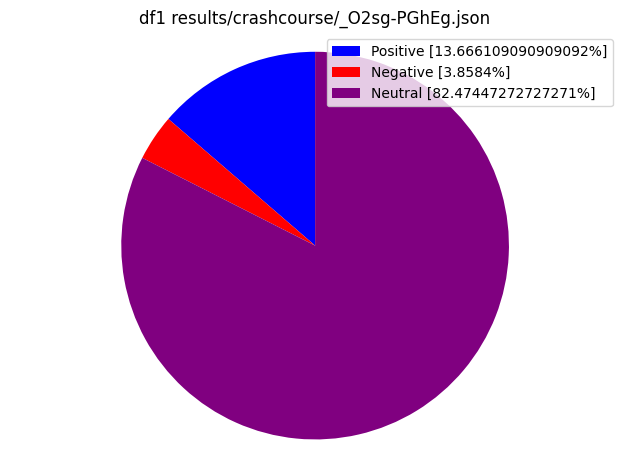

In [22]:
import matplotlib.pyplot as plt

labels = ['Positive ['+str(posavgpercentage1)+'%]', 'Negative ['+str(negavgpercentage1)+'%]', 'Neutral ['+str(neuavgpercentage1)+'%]']
sizes = [posavgpercentage1, negavgpercentage1, neuavgpercentage1]
colors = ['blue','red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df1 results/crashcourse/_O2sg-PGhEg.json") 

#def dump() function to extract video_title and use video_title to name csv file of comments of your own code

plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
posavgpercentage2 = pos_avg2*100
negavgpercentage2 = neg_avg2*100
neuavgpercentage2 = neu_avg2*100
compoundavgpercentage2 = compound_avg2*100

print('df2 \n positive % = {} \n negative % = {} \n neutral % = {} \n compound % = {}'.format(posavgpercentage2, negavgpercentage2, neuavgpercentage2, compoundavgpercentage2))

#if compoundavgpercentage2 > 50:
#   print('df2 sentiment is positive overall')
#elseif compoundavgpercentage2 < 50:
#   print('df2 sentiment is negative overall')
#else:
#   print('df2 sentiment is neutral overall')



df2 
 positive % = 15.04864864864865 
 negative % = 8.393693693693693 
 neutral % = 76.55900900900902 
 compound % = 12.650900900900902


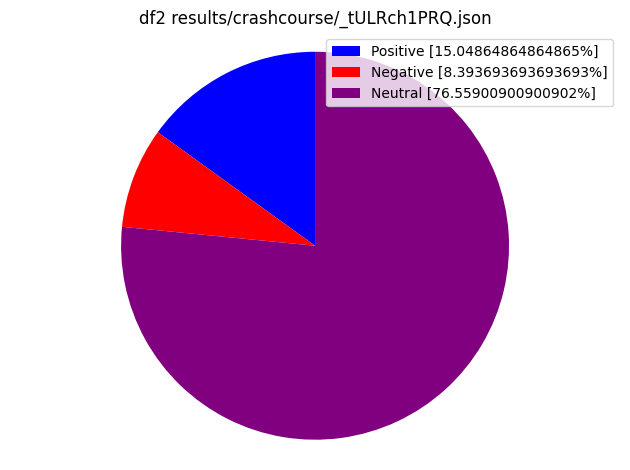

In [24]:
labels = ['Positive ['+str(posavgpercentage2)+'%]', 'Negative ['+str(negavgpercentage2)+'%]', 'Neutral ['+str(neuavgpercentage2)+'%]']
sizes = [posavgpercentage2, negavgpercentage2, neuavgpercentage2]
colors = ['blue','red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df2 results/crashcourse/_tULRch1PRQ.json") 

#def dump() function to extract video_title and use video_title to name csv file of comments of your own code

plt.axis('equal')
plt.tight_layout()
plt.show()

In [25]:
#https://pypi.org/project/emoji/
#https://unicode.org/emoji/charts/full-emoji-list.html

import emoji
print(emoji.emojize(':grinning_face:')) 
print(emoji.emojize(':thumbs_up:'))

😀
👍


# with emojis

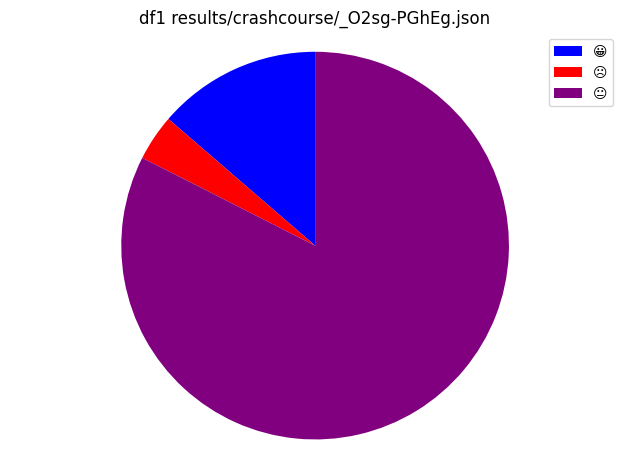

In [34]:
labels = [emoji.emojize(':grinning_face:'), emoji.emojize(':frowning_face:'), emoji.emojize(':neutral_face:')]
sizes = [posavgpercentage1, negavgpercentage1, neuavgpercentage1]
colors = ['blue', 'red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df1 results/crashcourse/_O2sg-PGhEg.json") 

plt.axis('equal')
plt.tight_layout()
plt.show()

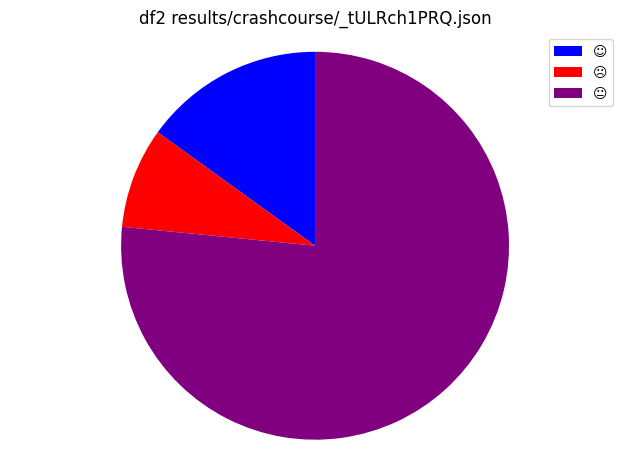

In [35]:
labels = [emoji.emojize(':smiling_face:'), emoji.emojize(':frowning_face:'), emoji.emojize(':neutral_face:')]
sizes = [posavgpercentage2, negavgpercentage2, neuavgpercentage2]
colors = ['blue', 'red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df2 results/crashcourse/_tULRch1PRQ.json") 

plt.axis('equal')
plt.tight_layout()
plt.show()

# amount of sentiments based on compound scoring of every comment
### e.g: 1 positive is of 1 comment

<AxesSubplot:>

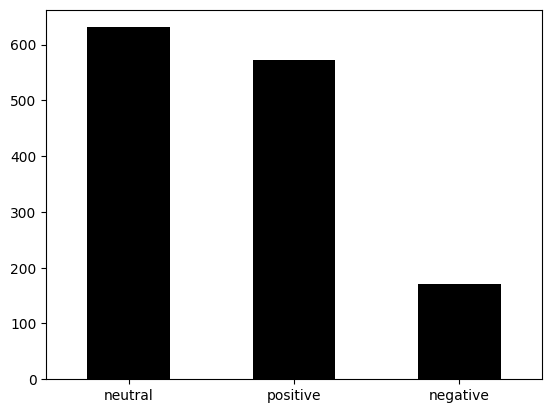

In [36]:
result1 = df1['sentiment'].value_counts()
result1.plot(kind='bar', rot=0, color=['black', 'black', 'black'])

<AxesSubplot:>

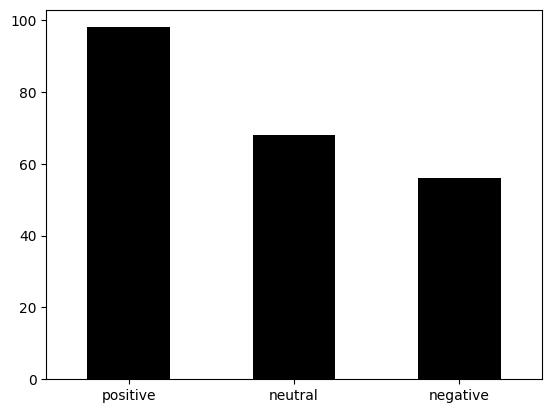

In [37]:
result2 = df2['sentiment'].value_counts()
result2.plot(kind='bar', rot=0, color=['black', 'black', 'black'])

In [ ]:
# CREDITS https://github.com/cjhutto/vaderSentiment#about-the-scoring
# CITE Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.